Modeling channels with multipath fading and Doppler shift using different approaches

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from statsmodels.tsa.arima_process import ArmaProcess
import scipy.signal
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

(array([ 1.,  1.,  0.,  2.,  0.,  0.,  0.,  2.,  3.,  6.,  9.,  4.,  6.,
         5.,  3.,  4.,  5.,  8.,  9.,  4.,  8., 14., 11., 10., 10.,  7.,
        12.,  7., 10.,  5.,  8., 10., 10.,  8., 13., 10., 12., 15., 13.,
         9., 10., 15., 13., 15., 14., 17., 13., 12., 16., 14., 18., 16.,
         9., 19., 17., 28., 14., 17., 15., 20., 17., 20., 14., 20., 15.,
        22., 21., 25., 20., 20., 18., 22., 16., 23., 21., 16., 21., 16.,
        20., 17., 13., 21., 15., 17., 19., 25., 20., 33., 24., 18., 19.,
        29., 24., 22., 26., 23., 23., 23., 22., 25., 27., 23., 35., 20.,
        25., 23., 28., 29., 23., 23., 16., 18., 25., 34., 24., 25., 32.,
        17., 33., 21., 24., 24., 25., 22., 34., 24., 24., 23., 27., 22.,
        22., 24., 28., 20., 30., 25., 24., 24., 20., 18., 31., 16., 31.,
        26., 19., 22., 28., 24., 17., 18., 28., 22., 21., 32., 25., 22.,
        17., 18., 29., 24., 21., 24., 22., 30., 15., 16., 12., 20., 27.,
        27., 27., 25., 19., 27., 16., 13., 14., 19.

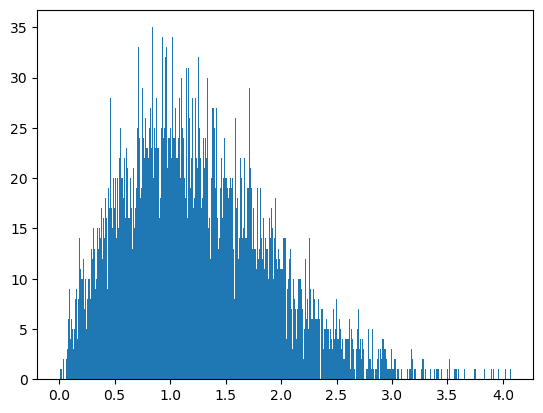

In [84]:
#Rayleigh distribution for multipath fading component - no line of sight approach exists
R1 = []
N = 5000
for i in range(N):
    X1 = float(np.random.normal(0, 1, 1))
    X2 = float(np.random.normal(0, 1, 1))
    R = math.sqrt(X1**2 + X2**2)
    R1.append(R)
plt.hist(R1, 500)

Rayleigh Fading using the Jakes Model

In [60]:
def jakes_model(N, f_d, t):
    alpha_m = 2 * np.pi * np.random.rand(N)
    a_m = 2 * np.pi * np.random.rand(N)
    b_m = 2 * np.pi * np.random.rand(N)
    
    r_I_t = (1 / np.sqrt(N)) * np.sum(np.cos(2 * np.pi * f_d * np.cos(alpha_m)[:, None] * t + a_m[:, None]), axis=0)
    r_Q_t = (1 / np.sqrt(N)) * np.sum(np.sin(2 * np.pi * f_d * np.cos(alpha_m)[:, None] * t + b_m[:, None]), axis=0)
    
    r_t = r_I_t + 1j * r_Q_t
    return r_t

In [91]:
#Rayleigh fading is modeled using the sum-of-sinusoids Jakes Model


#Channel specific parameters
v = 100 #Motion of trnasmitter/receiver in kmph
fc = 200e6 #Carrier frequency of wave
N = 100 #Number of sinusoids/directions of wave reflection
Fs = 1e3 #Sampling rate

Fd = (v*1000)*fc/3e8 #Doppler frequency - maximum Doppler shift

t = np.arange(0, 1, 1/Fs) #Time vector
Rayleigh_fade = jakes_model(N, Fd, t) #Fading factors
#This must be applied to a signal propagating through a channel to get the fading signal.

Rayleigh Fading - Evaluation

Text(0, 0.5, 'Magnitude')

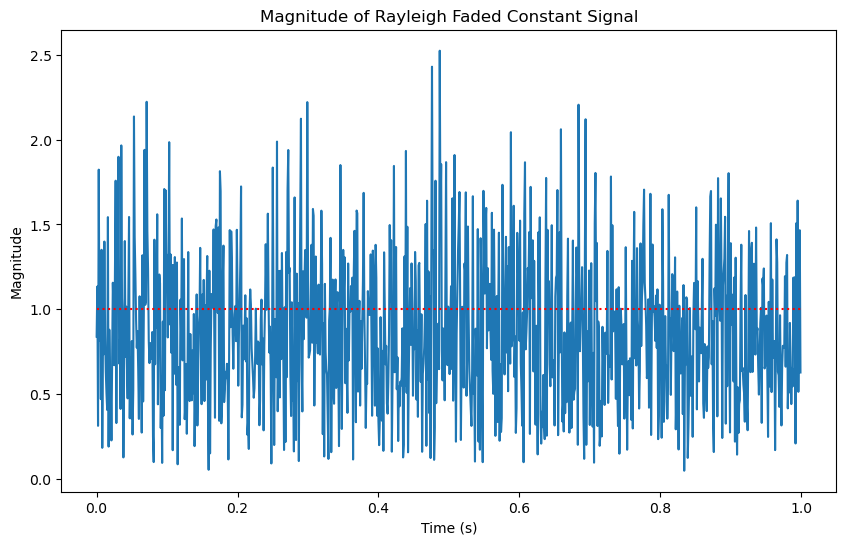

In [94]:
#A constant signal is sent through this channel and magnitude is measured at receiver
#Ignore path and shadow fading
signal_1 = np.ones_like(t)
faded_signal_1 = signal_1 * Rayleigh_fade
plt.figure(figsize=(10, 6))
plt.plot(t, np.abs(faded_signal_1))
plt.plot([0, 1], [1, 1], ':r') #Original signal
plt.title('Magnitude of Rayleigh Faded Constant Signal')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

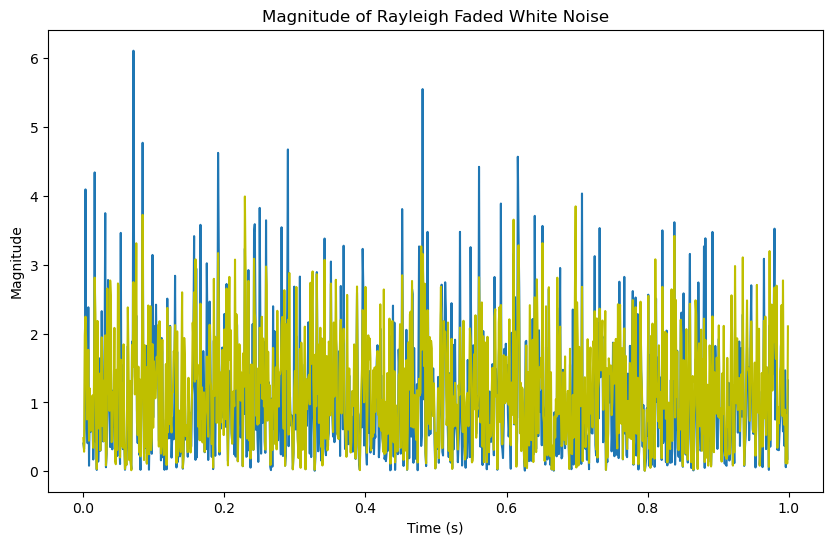

In [96]:
#A white noise signal is sent through the channel and magnitude is measured at rceiver
white_noise = np.random.normal(1, 1, len(t))
faded_signal_2 = white_noise * Rayleigh_fade
plt.figure(figsize=(10, 6))
plt.plot(t, np.abs(faded_signal_2))
plt.plot(t, np.abs(white_noise), 'y') #Original signal
plt.title('Magnitude of Rayleigh Faded White Noise')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

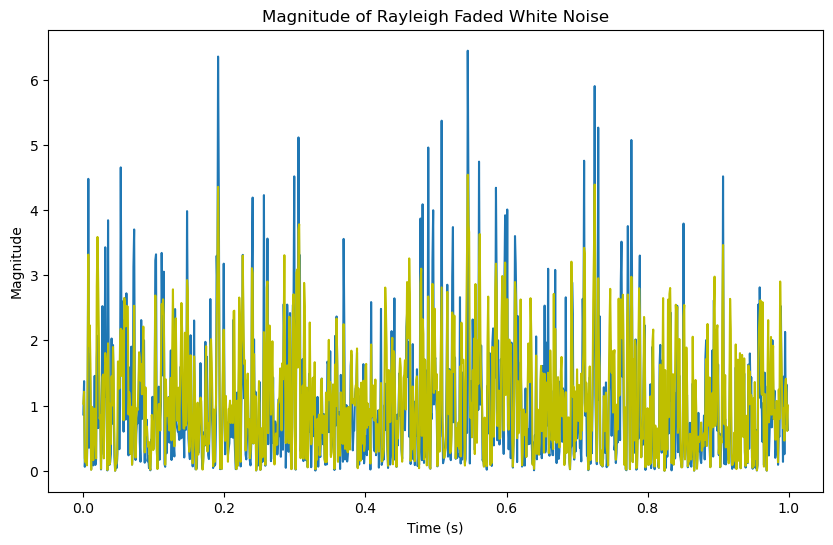

In [98]:
#Generate an order 1 ARMA process (1,1) through the channel and apply fading to it. Measure magnitude at receiver
ar_params = np.array([1, -0.5])  # AR coefficients (order 1 AR process)
ma_params = np.array([1, 0.5])   # MA coefficients (order 1 MA process)
arma_process = ArmaProcess(ar_params, ma_params)
arma_signal = arma_process.generate_sample(nsample=len(t))
faded_signal_3 = arma_signal * Rayleigh_fade
plt.figure(figsize=(10, 6))
plt.plot(t, np.abs(faded_signal_3))
plt.plot(t, np.abs(arma_signal), 'y') #Original signal
plt.title('Magnitude of Rayleigh Faded White Noise')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')

Plotting Autocorrelations and Crosscorrelations

C:\Users\vigne\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\vigne\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\vigne\anaconda3\Lib\site-packages\numpy\core\_asarray.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = array(a, dtype=dtype, order=order, copy=False, subok=subok)


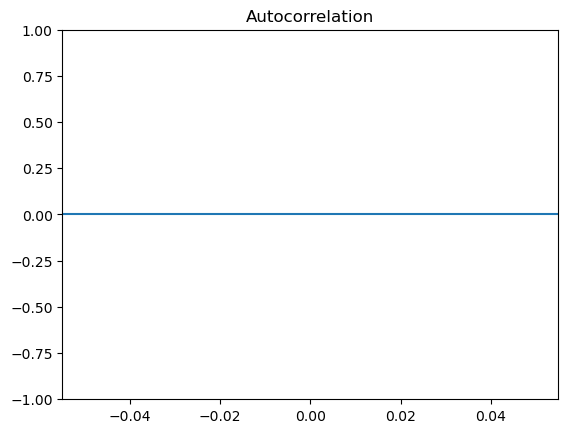

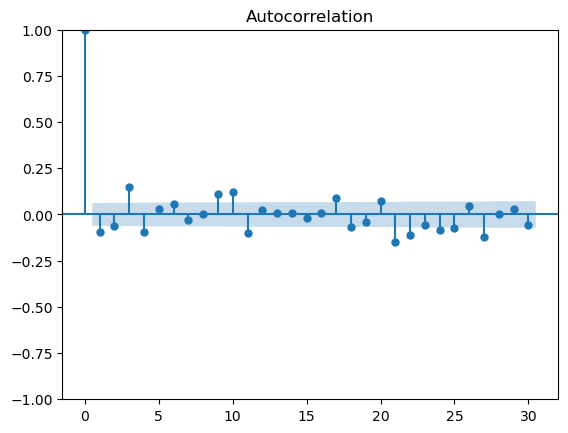

In [72]:
plot_acf(signal_1);
plot_acf(faded_signal_1);

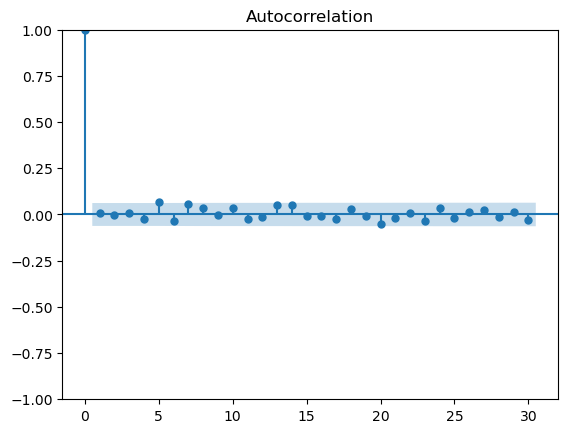

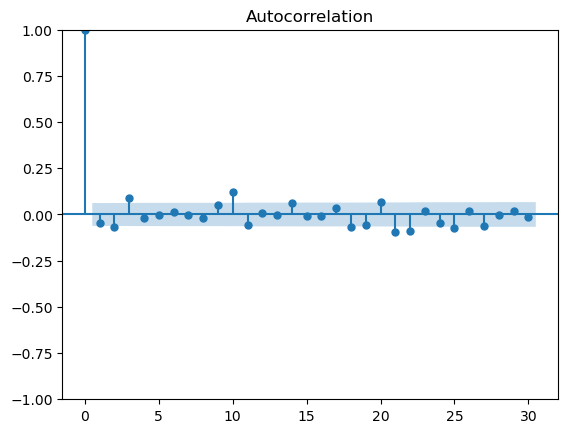

In [74]:
plot_acf(white_noise);
plot_acf(faded_signal_2);

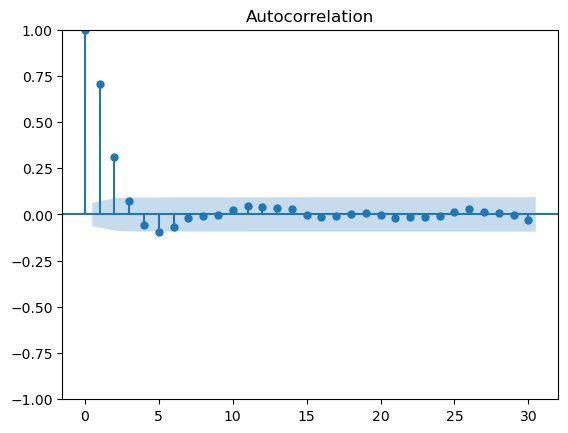

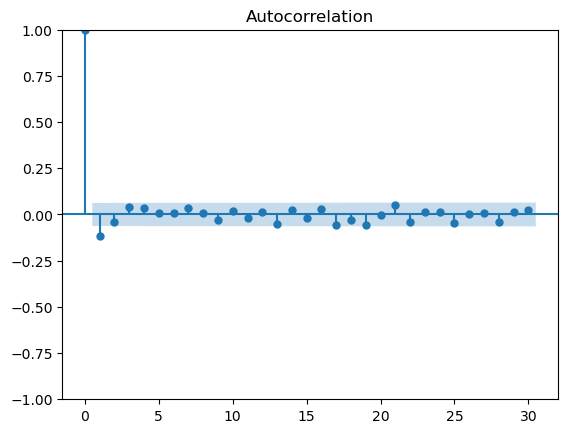

In [76]:
plot_acf(arma_signal);
plot_acf(faded_signal_3);

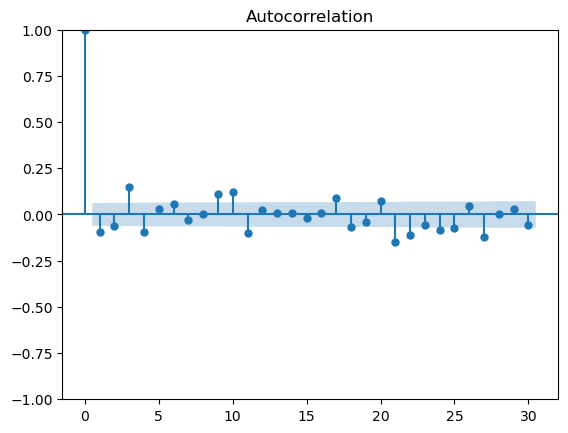

In [78]:
plot_acf(Rayleigh_fade);